In [149]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import numpy as np
import random

In [150]:
class MoneyModel(Model):
    
    """A model with some number of agents."""
   
    def __init__(self, N):
        self.num_agents = N
   
        
        self.schedule = RandomActivation(self)
        
        # Create agents  
        
        for i in range(self.num_agents):
            
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [177]:
class MoneyAgent(Agent):
    
    """ An agent with fixed initial wealth."""
    

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        for w in [random.randrange (1,101)]:
            self.wealth = w
        
        for c in [random.randrange (1,51)]:
            self.cost = c 

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += self.wealth
        self.wealth -= 1 #self.cost
        agent_N = ["Investor 1 ","Investor 2 ","Consumer 1 ","Consumer 2 ","Consumer 3 ","Prosumer 1 ","Prosumer 2 ","Prosumer 3 ","Retailer   ","Distributor"]
     
        print ("Hi, I am " + agent_N[self.unique_id] + " and my wealth is " + str(self.wealth))

In [178]:
empty_model = MoneyModel(10)
empty_model.step()

Hi, I am Distributor and my wealth is 38
Hi, I am Retailer    and my wealth is 14
Hi, I am Prosumer 3  and my wealth is 6
Hi, I am Consumer 3  and my wealth is 87
Hi, I am Prosumer 2  and my wealth is 182
Hi, I am Prosumer 1  and my wealth is 3
Hi, I am Investor 1  and my wealth is 88
Hi, I am Investor 2  and my wealth is 28
Hi, I am Consumer 1  and my wealth is 81
Hi, I am Consumer 2  and my wealth is 134


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()


Hi, I am Investor 1  and my wealth is 20
Hi, I am Investor 2  and my wealth is 76
Hi, I am Consumer 2  and my wealth is 21
Hi, I am Prosumer 1  and my wealth is 24
Hi, I am Retailer    and my wealth is 96
Hi, I am Consumer 1  and my wealth is 45
Hi, I am Consumer 3  and my wealth is 12
Hi, I am Prosumer 3  and my wealth is 72
Hi, I am Prosumer 2  and my wealth is 117
Hi, I am Consumer 1  and my wealth is 44
Hi, I am Prosumer 2  and my wealth is 116
Hi, I am Retailer    and my wealth is 140
Hi, I am Prosumer 3  and my wealth is 71
Hi, I am Prosumer 1  and my wealth is 281
Hi, I am Investor 2  and my wealth is 521
Hi, I am Consumer 2  and my wealth is 130
Hi, I am Investor 1  and my wealth is 19
Hi, I am Consumer 3  and my wealth is 84
Hi, I am Consumer 2  and my wealth is 299
Hi, I am Prosumer 3  and my wealth is 155
Hi, I am Investor 1  and my wealth is 18
Hi, I am Prosumer 2  and my wealth is 1275
Hi, I am Prosumer 1  and my wealth is 280
Hi, I am Consumer 3  and my wealth is 729
Hi, 

(array([1., 0., 1., 1., 0., 2., 1., 1., 0., 2.]),
 array([ 18334. , 103540.3, 188746.6, 273952.9, 359159.2, 444365.5,
        529571.8, 614778.1, 699984.4, 785190.7, 870397. ]),
 <BarContainer object of 10 artists>)

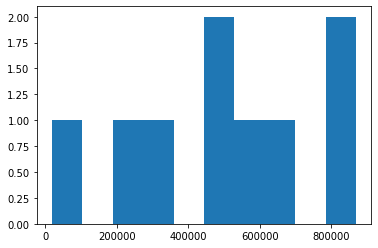

In [179]:
model = MoneyModel(9)

for i in range(10):
    model.step()
    
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)